In [63]:
import matplotlib.pyplot as plt

In [64]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Разграничим наши данные для обучения и валидации

In [65]:
directory = 'data'
target_size = (150, 150)    # размер изображения RGB
batch_size = 32
class_mode = 'categorical'

In [66]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory=directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory=directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    subset='validation'
)

Found 1279 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


# Создаём модель CNN

In [67]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [68]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# Обучение и валидация модели

In [69]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
40/40 [==============================] - 20s 479ms/step - loss: 1.9924 - acc: 0.1908 - val_loss: 1.8106 - val_acc: 0.3111
Epoch 2/5
40/40 [==============================] - 21s 531ms/step - loss: 1.5037 - acc: 0.3964 - val_loss: 1.4034 - val_acc: 0.4952
Epoch 3/5
40/40 [==============================] - 19s 474ms/step - loss: 1.1499 - acc: 0.5715 - val_loss: 1.1380 - val_acc: 0.6063
Epoch 4/5
40/40 [==============================] - 20s 499ms/step - loss: 0.9550 - acc: 0.6568 - val_loss: 1.1324 - val_acc: 0.5746
Epoch 5/5
40/40 [==============================] - 20s 504ms/step - loss: 0.7371 - acc: 0.7177 - val_loss: 1.0364 - val_acc: 0.6190


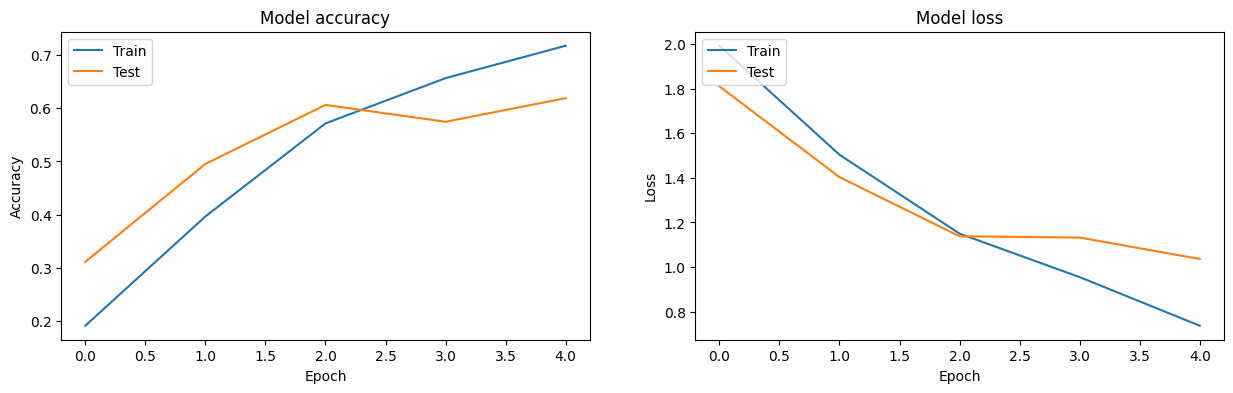

In [70]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()